In [1]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('international-airline-passengers.csv', usecols=[1])
df.describe()

In [ ]:
values = df.values.astype('float32')
values

In [15]:
train_size = int(values.shape[0]*0.67)
train_size

96

In [16]:
test_size = values.shape[0] - train_size
test_size

48

In [54]:
train_data = values[0:train_size, 0:]
train_data.shape

(96, 1)

In [55]:
test_data = values[train_size:, 0:]
test_data.shape

(48, 1)

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
train_data.shape[1]

1

In [57]:
def create_dataset(data, k):
  x_data, y_data = [], []
  for i in range(len(data)-k):
    x = data[i:i+k, 0]
    y = data[i+k, 0]
    x_data.append(x)
    y_data.append(y)
  return np.array(x_data), np.array(y_data)



In [66]:
look_back = 12
num_features = train_data.shape[1]
x_train, y_train = create_dataset(train_data, look_back)
x_test, y_test = create_dataset(test_data, look_back)
num_features

1

In [69]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], num_features))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], num_features))
x_train.shape

(84, 12, 1)

In [59]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [71]:
model = Sequential()
model.add(SimpleRNN(4, input_shape=(look_back, num_features)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size = 1)

Epoch 1/10
84/84 [==============================] - 1s 3ms/step - loss: 0.0213
Epoch 2/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0112
Epoch 3/10
84/84 [==============================] - 0s 5ms/step - loss: 0.0102
Epoch 4/10
84/84 [==============================] - 0s 5ms/step - loss: 0.0089
Epoch 5/10
84/84 [==============================] - 0s 5ms/step - loss: 0.0083
Epoch 6/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0075
Epoch 7/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0069
Epoch 8/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 9/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0062
Epoch 10/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0059


In [79]:
test_predict = model.predict(x_test)
test_predict = scaler.inverse_transform(test_predict).ravel()

train_predict = model.predict(x_train)
train_predict = scaler.inverse_transform(train_predict).ravel()

true_test = scaler.inverse_transform([y_test]).ravel()
true_train = scaler.inverse_transform([y_train]).ravel()

test_predict.shape, true_test.shape

3/3 [==============================] - 0s 4ms/step


((36,), (36,))

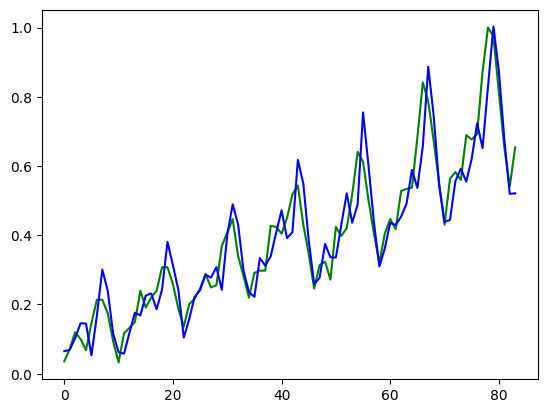

In [81]:
from matplotlib import pyplot as plt
plt.plot(true_train, c = 'g')
plt.plot(train_predict, c = 'b')
plt.show()

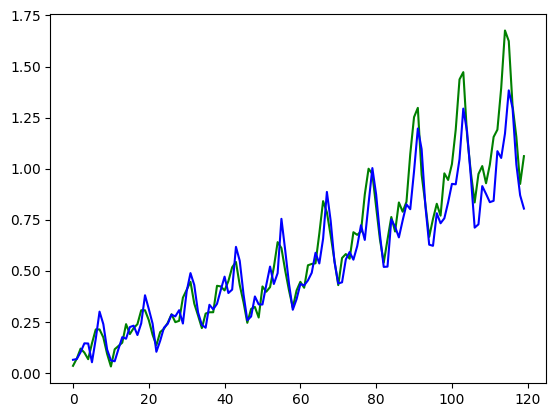

In [83]:
combinedPredicted = np.concatenate((train_predict, test_predict))
combinedtrue = np.concatenate((true_train, true_test))
plt.plot(combinedtrue, c = 'g')
plt.plot(combinedPredicted, c = 'b')
plt.show()